#    EDA

## 1. EXPLORACIÓN Y LIMPIEZA DE DATOS

En la primera parte del análisis exploratorio limpiamos el conjunto de datos. Al tenerlo proveniente de una dirección url en formato .csv, lo primero que hacemos es convertirla a DataFrame con la librería pandas y a continuación lo exportamos en .csv en el directorio del proyecto. 

Podemos visualizar el archivo con ayuda de extensiones para empezar a familiarizarnos con las columnas y los datos. A su vez disponemos de una descripción de las columnas que asímismo agregamos al directoio bajo la extensión .text y podemos acceder a ella en cualquier momento para aclarar las definiciones.

In [599]:
import pandas as pd
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
df = pd.read_csv(url, sep = ";")
# df.to_csv('bank.csv', index=False)

Nos deshacemos de cualquier posible duplicado y mostramos la información del conjunto para un coherente primer análisis de los contenidos. Muy rápidamente observamos que no contiene ningún valor nulo en ninguna columna, lo cual es un buen indicador de que la limpieza y, en general, el EDA en su conjunto, será menos complejo.

In [600]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [601]:
# imprimimos un par de valores únicos de columnas para simplemente realizar una primera observación
print(df["y"].unique())
print(df["default"].unique())


['no' 'yes']
['no' 'unknown' 'yes']


No tenemos mucho conocimiento sobre la relevancia de las columnas sobre el target final en este campo, así que decidimos quedarnos con todos los elementos en una primera instancia. Como excepción a esta afirmación sí eliminamos el tipo de contacto del cliente con la empresa.

In [602]:
total_data = df.drop(["contact"], axis=1)
total_data.shape

(41176, 20)

## 2. ANÁLISIS UNIVARIANTE

In [603]:
# Importamos las librerías necesarias para ejecutar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

Disponemos de manera visual un histograma por cada una de las variables. Echamos un vistazo a cómo están repartidos los valores dentro de cada columna.

/tmp/ipykernel_582/1905974777.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=320, fontsize=6)
/tmp/ipykernel_582/1905974777.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=90)


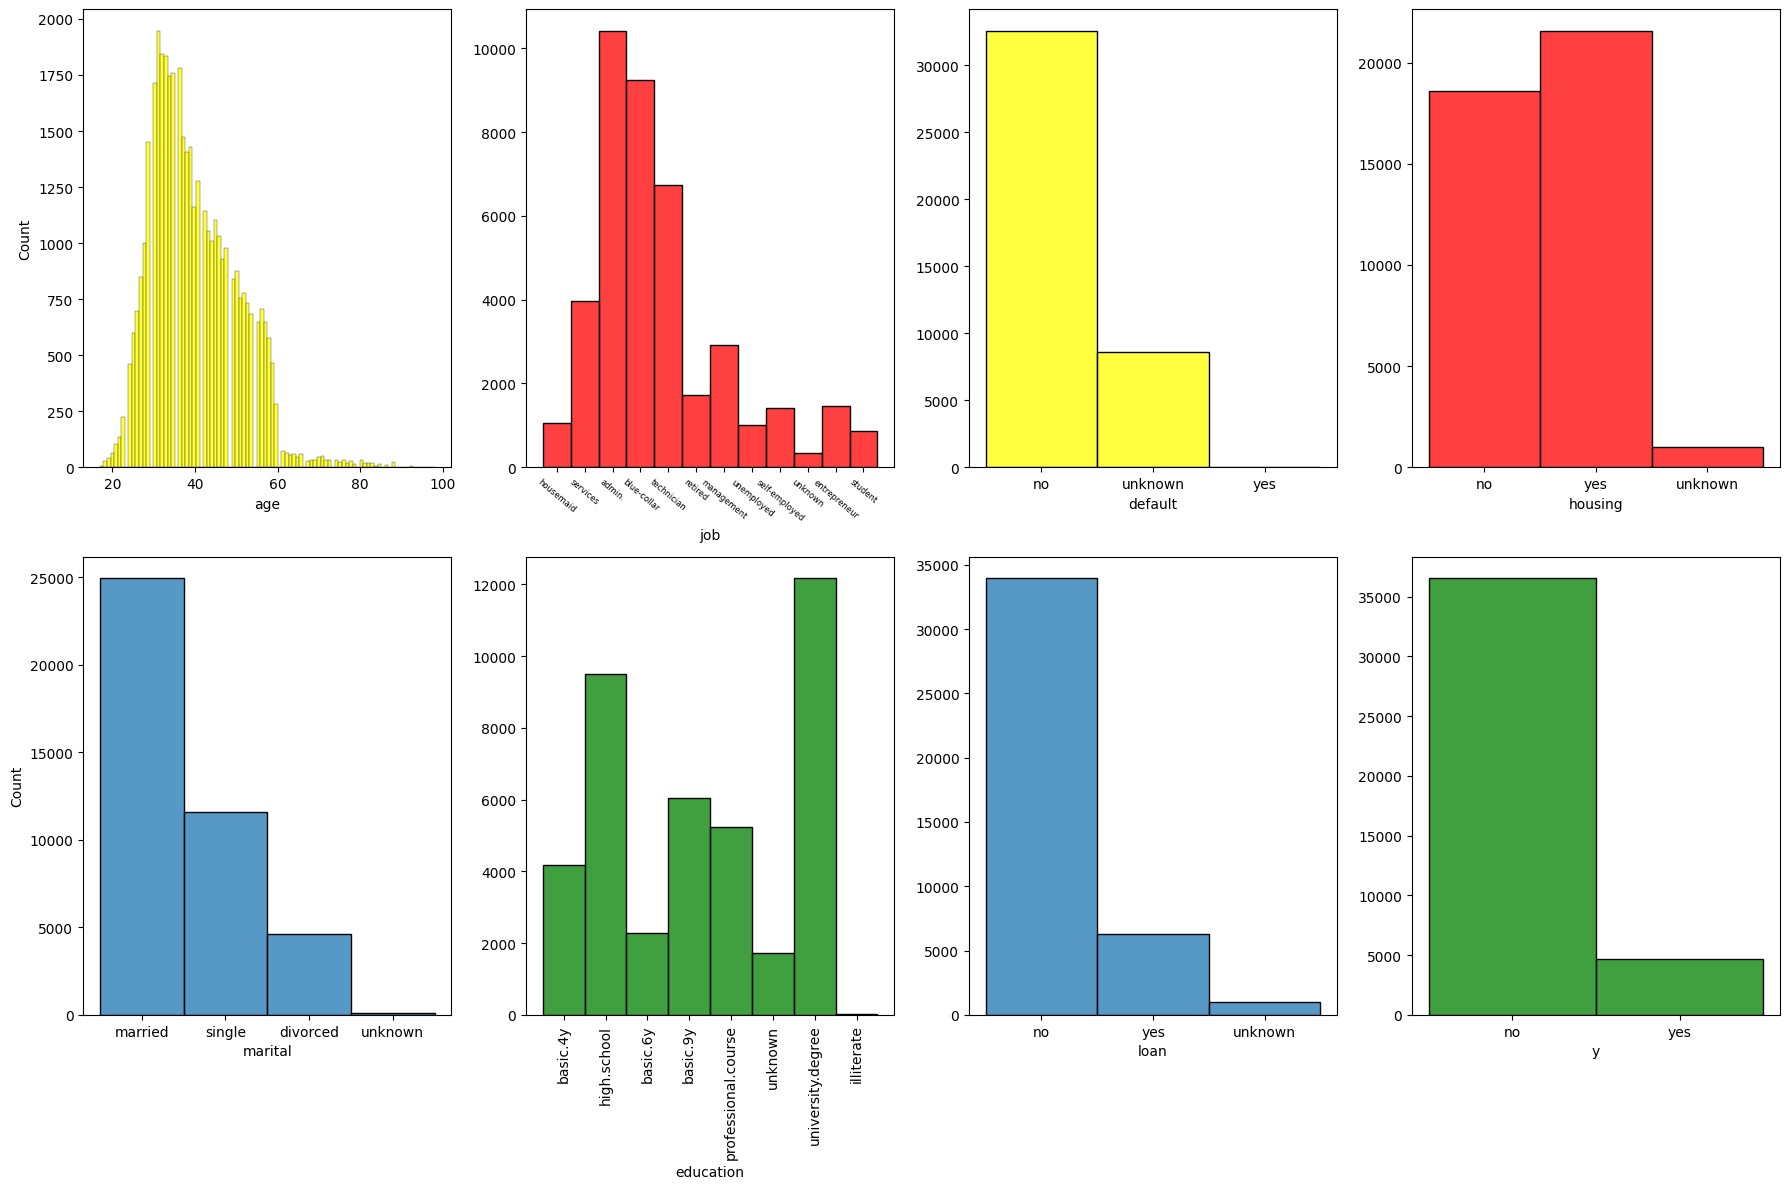

In [604]:
fig, axis = plt.subplots(2,4, figsize = (18,12))

sns.histplot(data = total_data["age"], ax= axis[0,0], color = 'yellow')
sns.histplot(data = total_data["job"], ax= axis[0,1], color = 'red').set_ylabel("")
sns.histplot(data = total_data["default"], ax= axis[0,2], color = 'yellow').set_ylabel("")
sns.histplot(data = total_data["housing"], ax= axis[0,3], color = 'red').set_ylabel("")
axis[0, 1].set_xticklabels(axis[0, 1].get_xticklabels(), rotation=320, fontsize=6)
sns.histplot(data = total_data["marital"], ax= axis[1,0])
sns.histplot(data = total_data["education"], ax= axis[1,1], color = 'green').set_ylabel("")
axis[1, 1].set_xticklabels(axis[1, 1].get_xticklabels(), rotation=90)
sns.histplot(data = total_data["loan"], ax= axis[1,2]).set_ylabel("")
sns.histplot(data = total_data["y"], ax= axis[1,3], color = 'green').set_ylabel("")

plt.tight_layout()
plt.show()

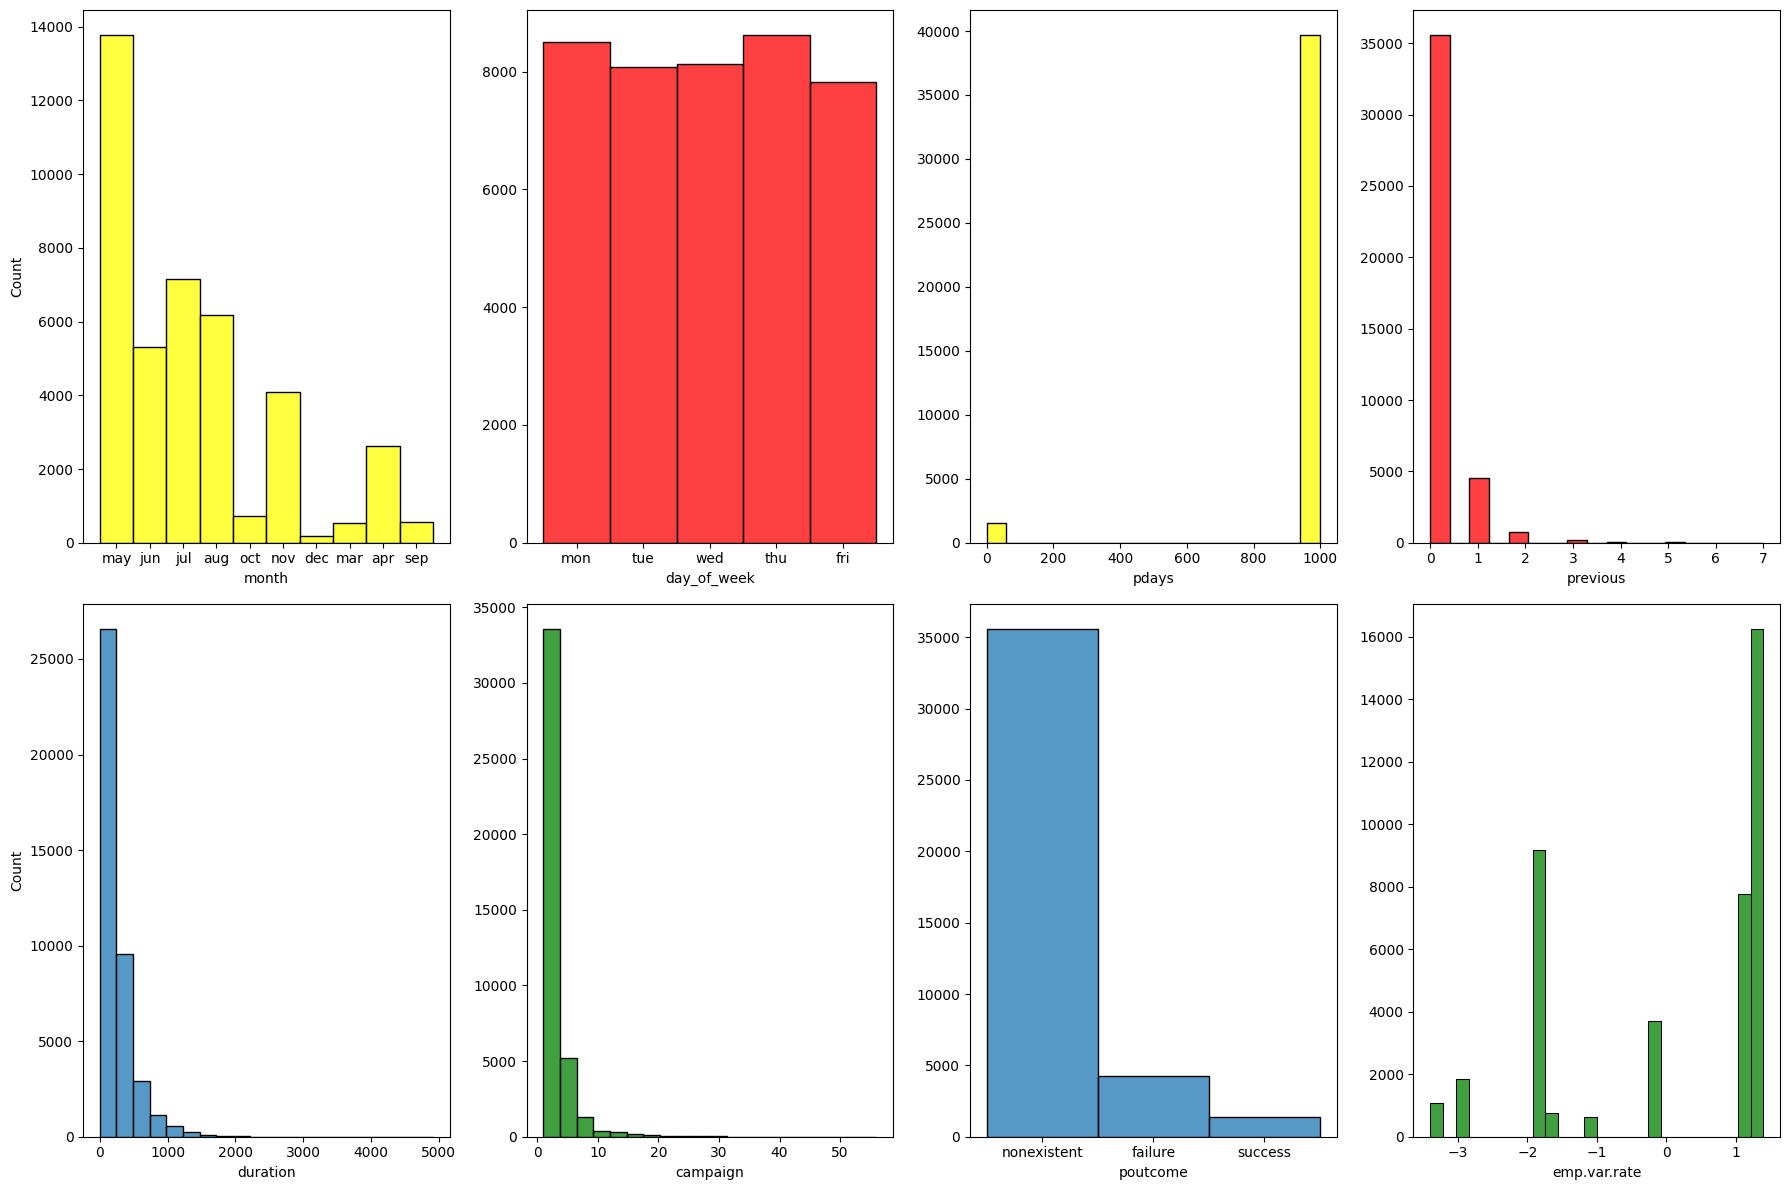

In [605]:
fig, axis = plt.subplots(2,4, figsize = (18,12))

sns.histplot(data = total_data["month"], ax= axis[0,0], color = 'yellow')
sns.histplot(data = total_data["day_of_week"], ax= axis[0,1], color = 'red').set_ylabel("")
sns.histplot(data = total_data["pdays"], ax= axis[0,2], color = 'yellow').set_ylabel("")
sns.histplot(data = total_data["previous"], ax= axis[0,3], color = 'red').set_ylabel("")
sns.histplot(data = total_data["duration"], ax= axis[1,0], bins = 20)
sns.histplot(data = total_data["campaign"], ax= axis[1,1], bins = 20, color = 'green').set_ylabel("")
sns.histplot(data = total_data["poutcome"], ax= axis[1,2]).set_ylabel("")
sns.histplot(data = total_data["emp.var.rate"], ax= axis[1,3], color = 'green').set_ylabel("")

plt.tight_layout()
plt.show()


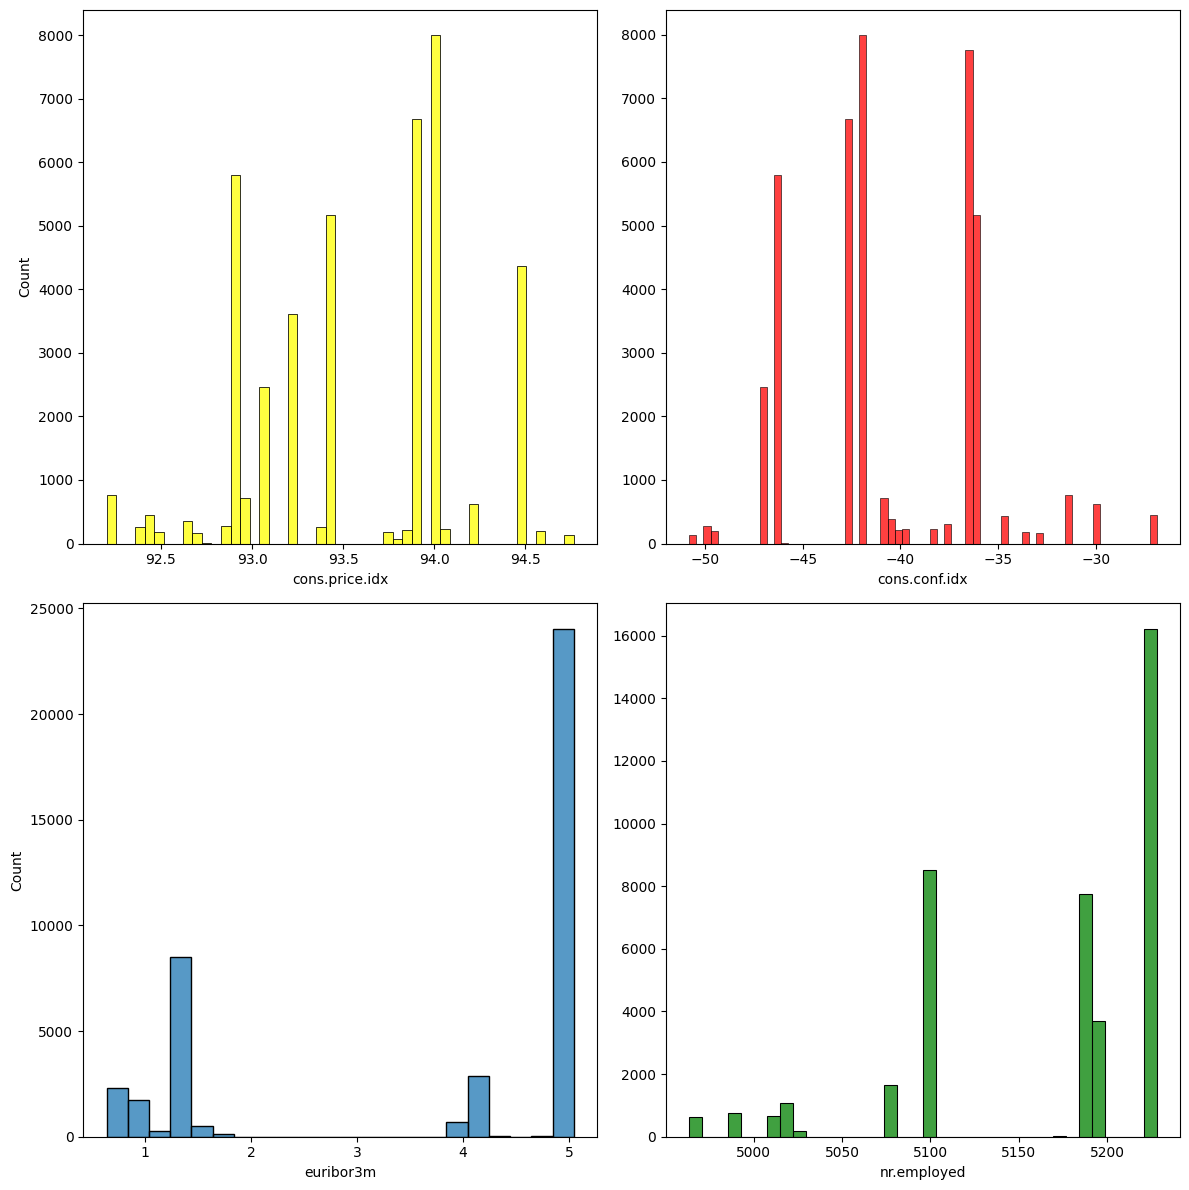

In [606]:
fig, axis = plt.subplots(2,2, figsize = (12,12))

sns.histplot(data = total_data["cons.price.idx"], ax= axis[0,0], color = 'yellow')
sns.histplot(data = total_data["cons.conf.idx"], ax= axis[0,1], color = 'red').set_ylabel("")
sns.histplot(data = total_data["euribor3m"], ax= axis[1,0])
sns.histplot(data = total_data["nr.employed"], ax= axis[1,1], color = 'green').set_ylabel("")

plt.tight_layout()
plt.show()

Tomando los datos del archivo .text factorizamos todas las columnas categóricas a numéricas para poder trabajar los datos dentro del modelo.

In [607]:
# Creamos una función que factoriza los valores insertados
def factor(column):
    total_data[column] = pd.factorize(total_data[column])[0]

# Creamos otra función que nos almacenará el nombre de las etiquetas en una lista
tag_list = []
def tags (column):
    tag_string = pd.factorize(total_data[column])[1]
    tag_list.append(tag_string)

# Creamos una lista de las columnas categóricas
to_factor = ["job", "marital", "education", "default", "housing","loan", "month", "day_of_week", "poutcome", "y" ]

# Iteramos sobre esta lista para pasar cada elemento a la función
for i in to_factor:
    tags(i)   

for i in to_factor:
    factor(i)


total_data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [608]:
tag_list

[Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'],
       dtype='object'),
 Index(['married', 'single', 'divorced', 'unknown'], dtype='object'),
 Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree', 'illiterate'],
       dtype='object'),
 Index(['no', 'unknown', 'yes'], dtype='object'),
 Index(['no', 'yes', 'unknown'], dtype='object'),
 Index(['no', 'yes', 'unknown'], dtype='object'),
 Index(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], dtype='object'),
 Index(['mon', 'tue', 'wed', 'thu', 'fri'], dtype='object'),
 Index(['nonexistent', 'failure', 'success'], dtype='object'),
 Index(['no', 'yes'], dtype='object')]

## 3. ANÁLISIS MULTIVARIANTE

En este punto relacionamos cada una de las variables con el target y con el regplot podemos visualizar la derivada que nos mostrará si la relación es mayor o menor.

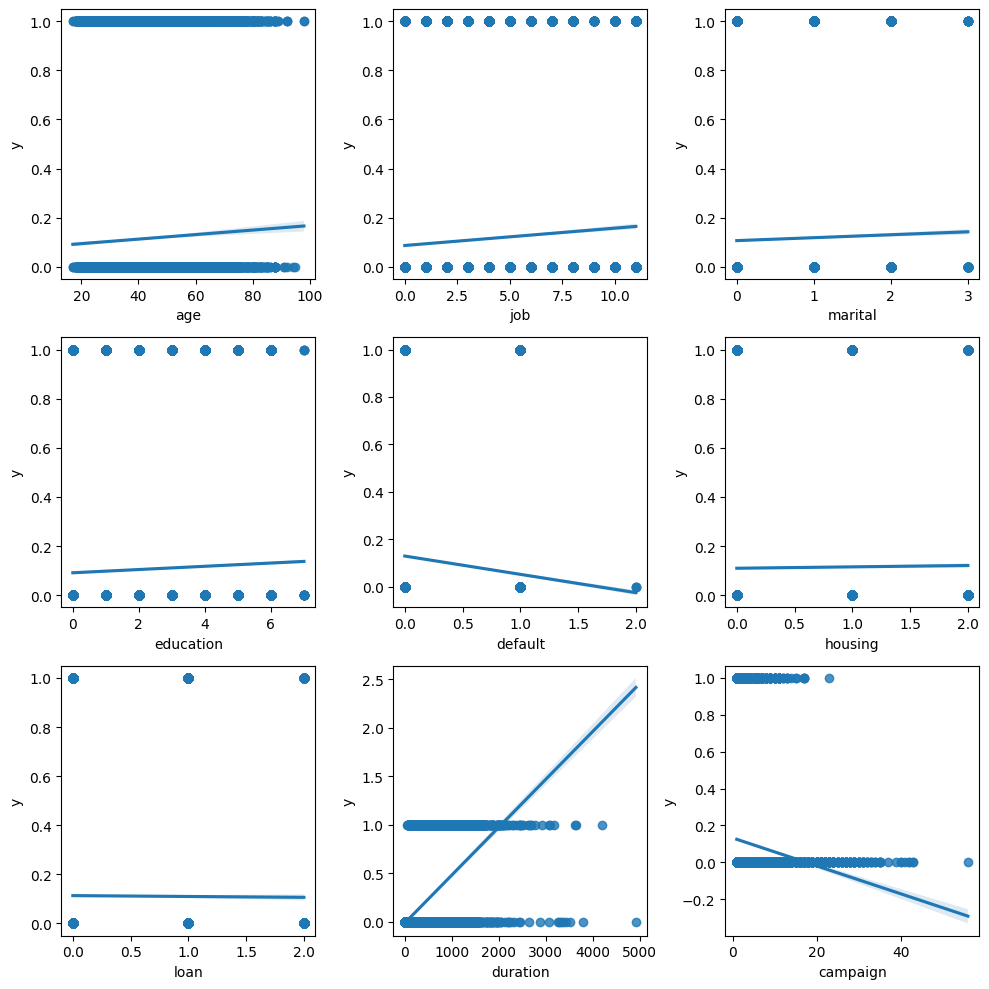

In [609]:
fig, axis = plt.subplots(3,3, figsize = (10,10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "y")
sns.regplot(ax = axis[0, 1], data = total_data, x = "job", y = "y")
sns.regplot(ax = axis[0, 2], data = total_data, x = "marital", y = "y")
sns.regplot(ax = axis[1, 0], data = total_data, x = "education", y = "y")
sns.regplot(ax = axis[1, 1], data = total_data, x = "default", y = "y")
sns.regplot(ax = axis[1, 2], data = total_data, x = "housing", y = "y")
sns.regplot(ax = axis[2, 0], data = total_data, x = "loan", y = "y")
sns.regplot(ax = axis[2, 1], data = total_data, x = "duration", y = "y")
sns.regplot(ax = axis[2, 2], data = total_data, x = "campaign", y = "y")

plt.tight_layout()
plt.show()

In [610]:
total_data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


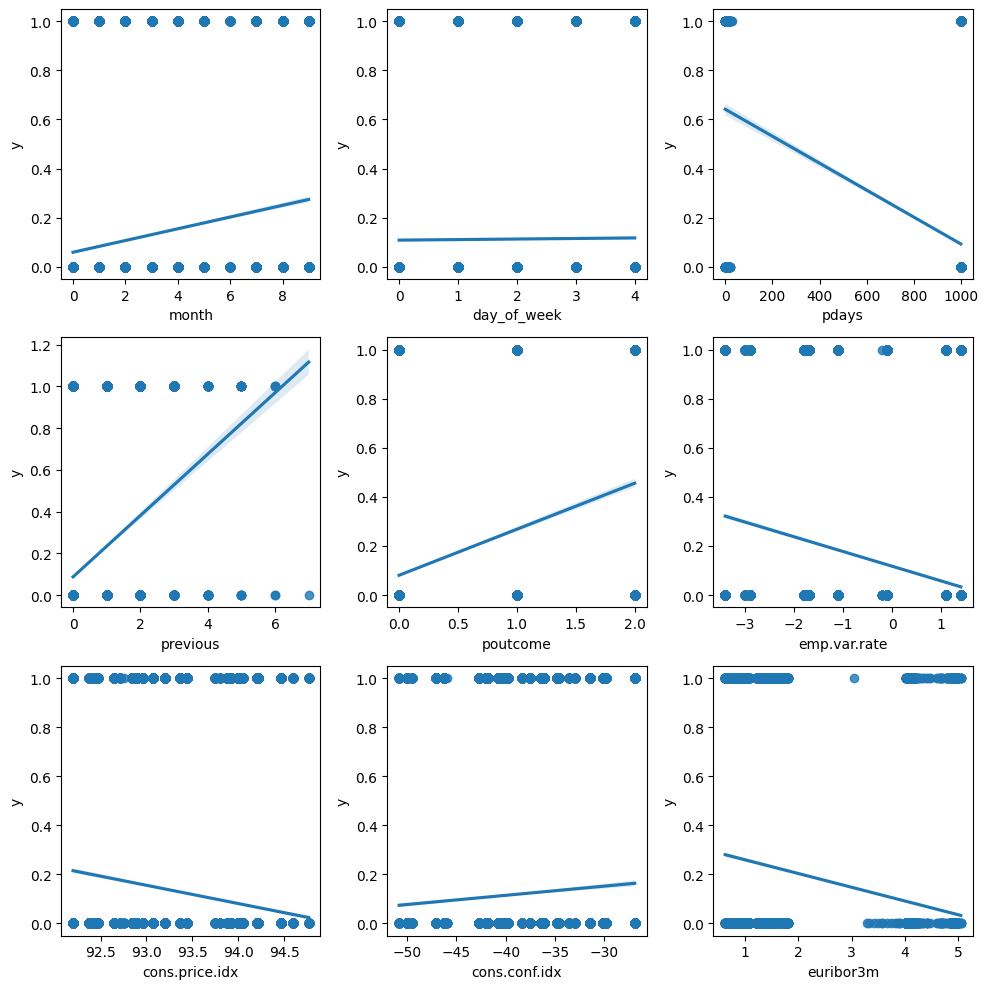

In [611]:
fig, axis = plt.subplots(3,3, figsize = (10,10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "month", y = "y")
sns.regplot(ax = axis[0, 1], data = total_data, x = "day_of_week", y = "y")
sns.regplot(ax = axis[0, 2], data = total_data, x = "pdays", y = "y")
sns.regplot(ax = axis[1, 0], data = total_data, x = "previous", y = "y")
sns.regplot(ax = axis[1, 1], data = total_data, x = "poutcome", y = "y")
sns.regplot(ax = axis[1, 2], data = total_data, x = "emp.var.rate", y = "y")
sns.regplot(ax = axis[2, 0], data = total_data, x = "cons.price.idx", y = "y")
sns.regplot(ax = axis[2, 1], data = total_data, x = "cons.conf.idx", y = "y")
sns.regplot(ax = axis[2, 2], data = total_data, x = "euribor3m", y = "y")

plt.tight_layout()
plt.show()

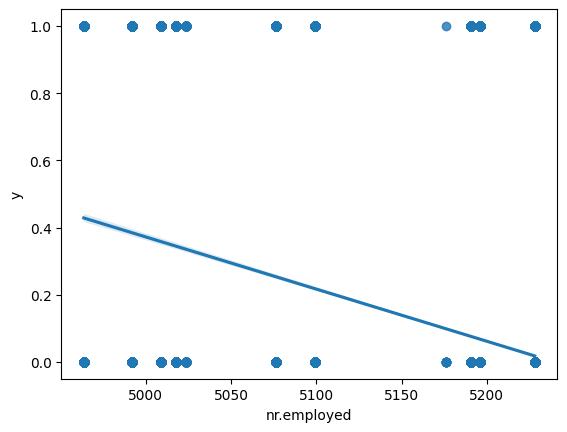

In [612]:
sns.regplot( data = total_data, x = "nr.employed", y = "y")

plt.show()

Job:
Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object')


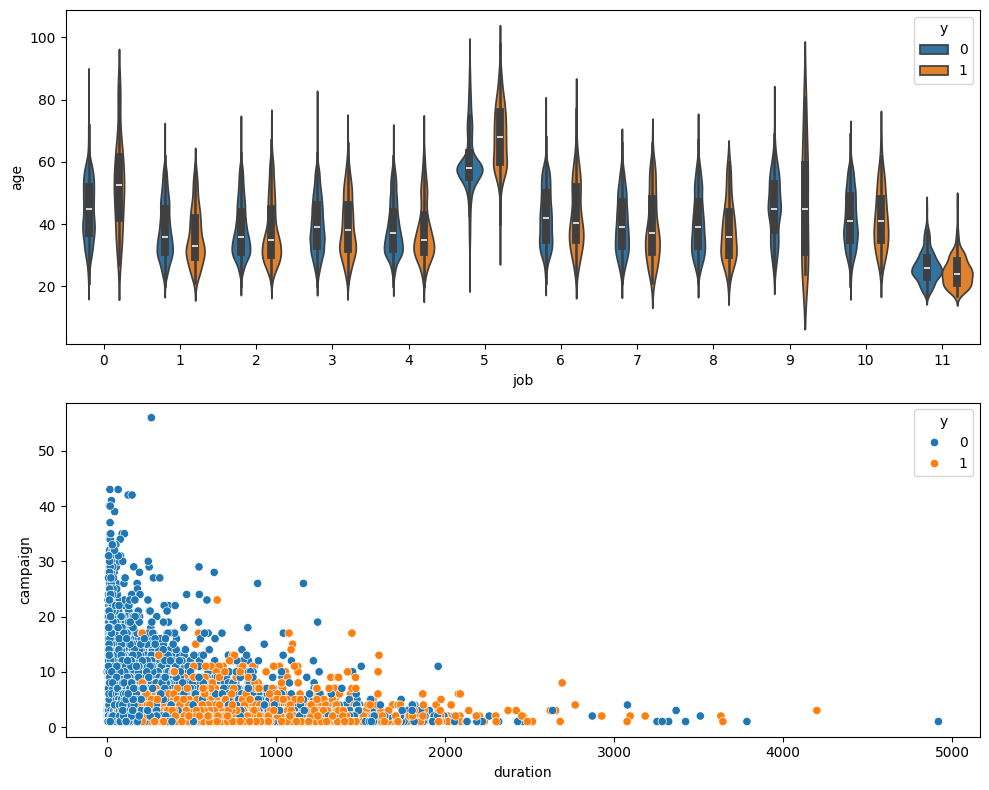

In [613]:
fig, axis = plt.subplots(2, figsize = (10,8))
sns.violinplot(data = total_data, x ="job", y ="age", hue = "y", ax = axis[0])
sns.scatterplot(data = total_data, x ="duration", y ="campaign", hue = "y", ax = axis[1])

print(f'Job:\n{tag_list[0]}')

plt.tight_layout()
plt.show()

Martial:
Index(['married', 'single', 'divorced', 'unknown'], dtype='object')
Education:
Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object')
Months:
Index(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], dtype='object')


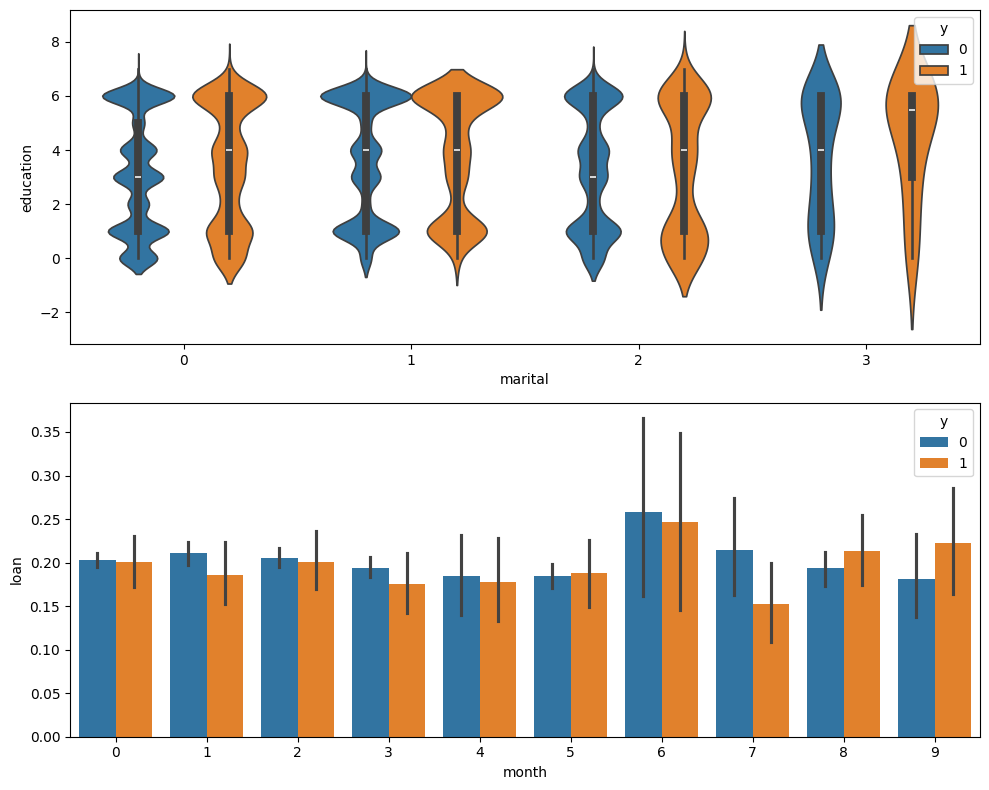

In [614]:
fig, axis = plt.subplots(2, figsize = (10,8))
sns.violinplot(data = total_data, x ="marital", y ="education", hue = "y", ax = axis[0])
sns.barplot(data = total_data, x ="month", y ="loan", hue = "y", ax = axis[1])

print(f'Martial:\n{tag_list[1]}')
print(f'Education:\n{tag_list[2]}')
print(f'Months:\n{tag_list[6]}')
plt.tight_layout()
plt.show()


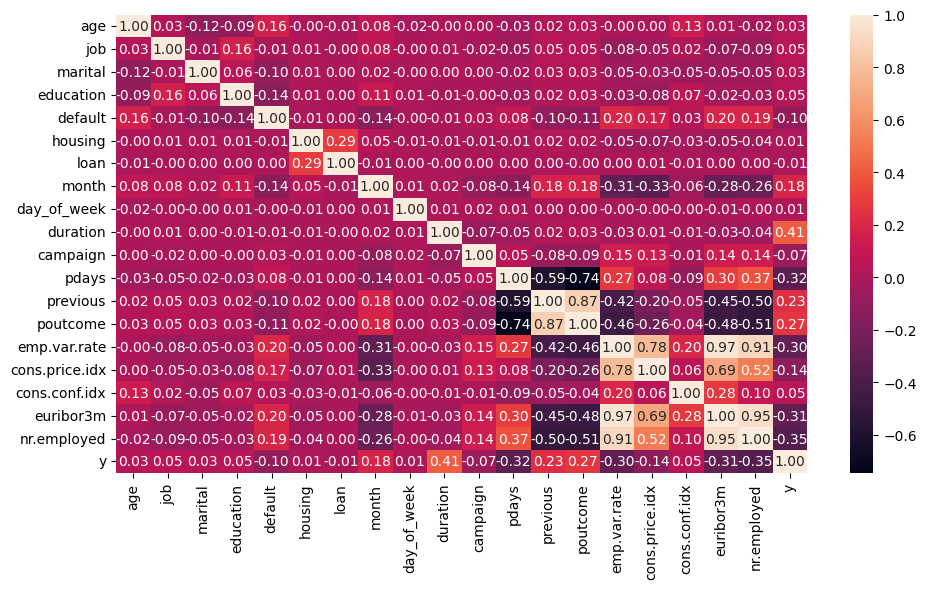

In [615]:
fig, axis = plt.subplots(figsize = (10, 6))
lista_de_columnas = total_data.columns.tolist()
sns.heatmap(total_data[lista_de_columnas].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Tras observar este mapa de calor, en concreto las correlaciones con el target (y), resaltamos que exiten correlaciones con varios elementos como (en orden de mayor a menos) duración del contacto previo en segundos, resultado de la campaña de marketing anterior, número de contactos realizados durante la campaña anterior al cliente y último mes en el que se le ha contactado. De igual forma, también consideramos las de menor correlación, que serían (de menor a mayor correalción) número de empleados/Indicador trimestral, número de días que transcurrieron desde la última campaña hasta que fue contactado, tasa EURIBOR 3 meses/Indicador diario y asa de variación del empleo/Indicador trimestral.

También hay relaciones muy fuertes entre otras variables, pero nosotros nos vamos a centrar, de momento, únicamente en las realciones con el objetivo.

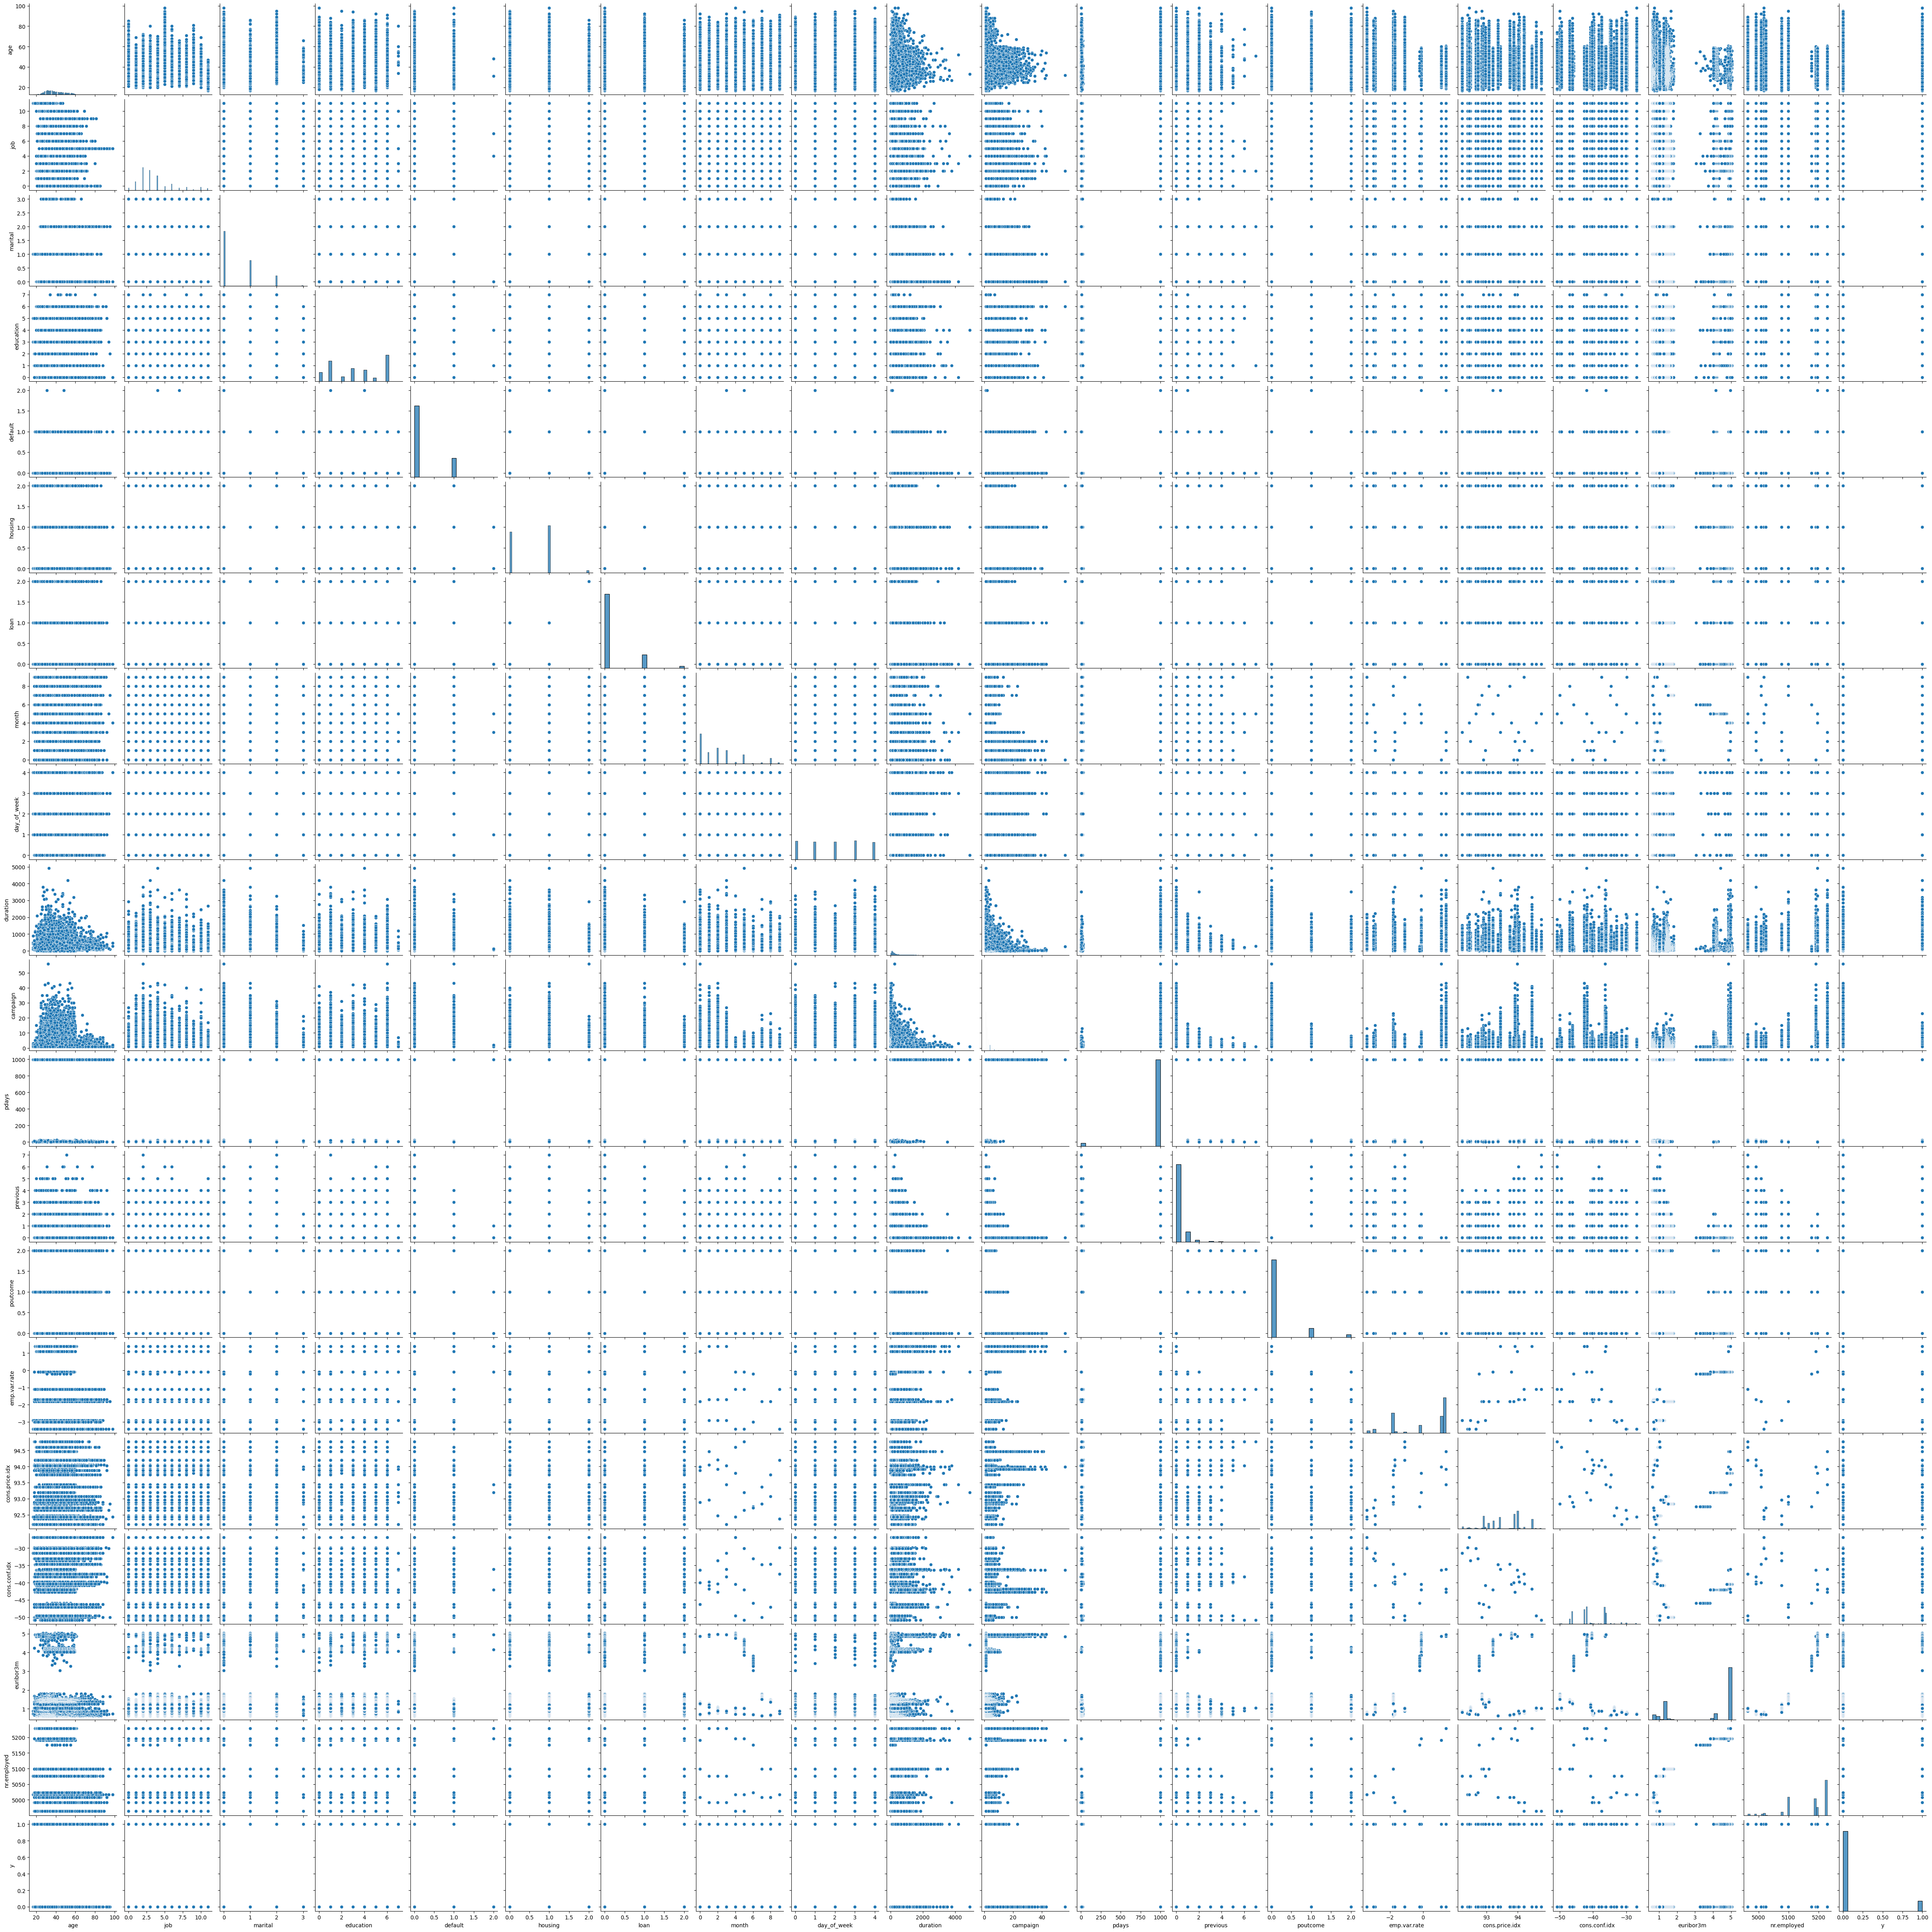

In [616]:
sns.pairplot(data = total_data)

# II. Feature engineering 

## 1. Análisis de outliers

La función .describe() nos permite observar la variabilidad así como los cuartiles de todas las variables. Lo realizamos para tomar apuntes.

In [617]:
total_data.describe()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,2.249951,1.979600,258.315815,2.567879,962.464810,0.173013,0.169953,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,2.429157,1.411539,259.305321,2.770318,186.937102,0.494964,0.455811,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.000000,1.000000,999.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,2.000000,180.000000,2.000000,999.000000,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,3.000000,3.000000,319.000000,3.000000,999.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Vemos una enorme variabilidad en el duration con mucha diferencia a la siguiente, que la encontraríamos en pdays, con distancia también sobre la siguiente que estaría en nr.employed.

Los dispondremos en boxplots para poder visualizar la distribución y llegar a identificar posibles outliers para posteriormente eliminarlos si fuese conveniente. Cogemos las 4 mayores variabilidades como criterio.

<Axes: ylabel='nr.employed'>

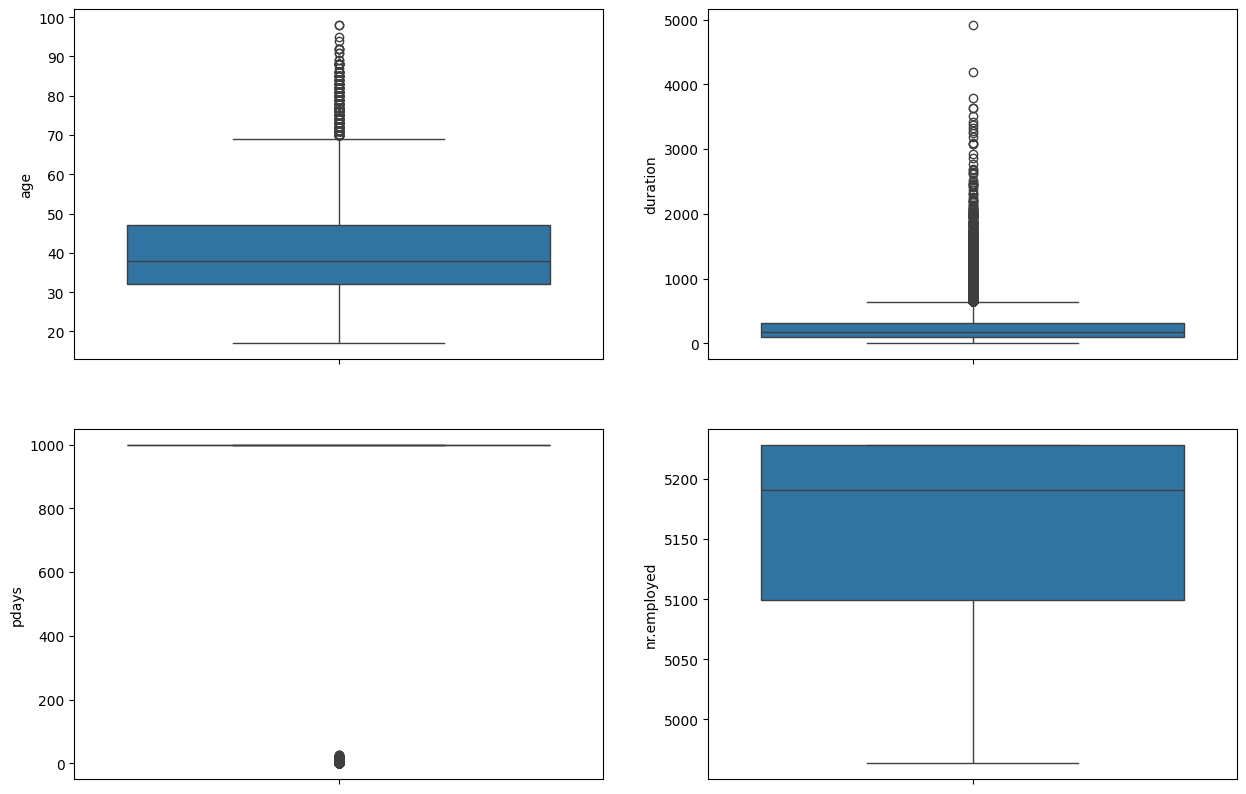

In [618]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "duration")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "pdays")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "nr.employed")


Buscamos valores porcentuales con ceros en nuestro conjunto para ver si tuviésemos que sustituirlos, pero como ya habiamos observado en el primer paso, no sería necesario este paso.

In [619]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age               0.0
job               0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
campaign          0.0
duration          0.0
day_of_week       0.0
month             0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64

Normalizamos los datos con StandlardScaler para escalarlos.

In [620]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[lista_de_columnas])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = lista_de_columnas)
total_data_norm["y"] = total_data["y"]
total_data_norm.head()


,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533143,-1.496903,-0.732848,-1.499576,-0.513657,-1.056816,-0.438165,-0.926239,-1.402457,0.010352,-0.565963,0.195443,-0.349551,-0.372864,0.648101,0.722628,0.886568,0.712463,0.331695,0
1,1.629107,-1.089456,-0.732848,-1.042021,1.945111,-1.056816,-0.438165,-0.926239,-1.402457,-0.421577,-0.565963,0.195443,-0.349551,-0.372864,0.648101,0.722628,0.886568,0.712463,0.331695,0
2,-0.290177,-1.089456,-0.732848,-1.042021,-0.513657,0.790896,-0.438165,-0.926239,-1.402457,-0.124626,-0.565963,0.195443,-0.349551,-0.372864,0.648101,0.722628,0.886568,0.712463,0.331695,0
3,-0.002284,-0.682010,-0.732848,-0.584467,-0.513657,-1.056816,-0.438165,-0.926239,-1.402457,-0.413864,-0.565963,0.195443,-0.349551,-0.372864,0.648101,0.722628,0.886568,0.712463,0.331695,0
4,1.533143,-1.089456,-0.732848,-1.042021,-0.513657,-1.056816,1.754578,-0.926239,-1.402457,0.187751,-0.565963,0.195443,-0.349551,-0.372864,0.648101,0.722628,0.886568,0.712463,0.331695,0


Utilizamos f_regression ya que se trata de un problema de tipo numérico y dividimos el set normalizado entre x e y, train y test.

In [621]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

In [622]:
# We divide the dataset into training and test samples.
X = total_data_norm.drop("y", axis = 1)
y = total_data_norm["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,-0.591263,0.195443,0.839079,0.773578,0.845186
1,-0.861218,0.195443,0.839079,0.776461,0.845186
2,1.765061,0.195443,0.839079,0.773002,0.845186
3,0.523267,0.195443,-1.198017,-1.362011,-0.940269
4,-0.537272,0.195443,-0.115810,0.230456,0.398131


In [623]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

In [624]:
X_train_sel.to_csv("/workspaces/EDA_2/src/clean_bank_train.csv", index=False)
X_test_sel.to_csv("/workspaces/EDA_2/src/clean_bank_test.csv", index=False)

En este paso trabajaremos el train y test con LogisticRegression con lo que nuestro objetivo final será obtener la precisión de nuestro modelo de Machine Learning. Será un modelo supervisado y decidimos pasarle todas las combinaciones de hiperparámetros para que la máquina determine los mejores. Al ser este un conjunto pequeño, no requerirá mucho tiempo realizar esta acción.

In [625]:
from sklearn.linear_model import LogisticRegression

In [626]:
train_data = pd.read_csv("/workspaces/EDA_2/src/clean_bank_train.csv")
test_data = pd.read_csv("/workspaces/EDA_2/src/clean_bank_test.csv")
train_data.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed,y
0,-0.591263,0.195443,0.839079,0.773578,0.845186,0
1,-0.861218,0.195443,0.839079,0.776461,0.845186,0
2,1.765061,0.195443,0.839079,0.773002,0.845186,1
3,0.523267,0.195443,-1.198017,-1.362011,-0.940269,0
4,-0.537272,0.195443,-0.115810,0.230456,0.398131,0


In [627]:
model = LogisticRegression(random_state=24)
model

LogisticRegression(random_state=24)

In [628]:
X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_train.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,-0.591263,0.195443,0.839079,0.773578,0.845186
1,-0.861218,0.195443,0.839079,0.776461,0.845186
2,1.765061,0.195443,0.839079,0.773002,0.845186
3,0.523267,0.195443,-1.198017,-1.362011,-0.940269
4,-0.537272,0.195443,-0.115810,0.230456,0.398131


In [629]:
y_train

0        0
1        0
2        1
3        0
4        0
        ..
32935    0
32936    0
32937    1
32938    0
32939    0
Name: y, Length: 32940, dtype: int64

In [630]:
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]
X_test.head()

,duration,pdays,emp.var.rate,euribor3m,nr.employed
0,-0.907497,0.195443,0.839079,0.772425,0.845186
1,-0.417720,0.195443,0.839079,0.775308,0.845186
2,-0.309738,0.195443,-1.198017,-1.277833,-0.940269
3,-0.695389,0.195443,-1.898269,-1.361434,-1.257222
4,-0.745523,0.195443,0.839079,0.773578,0.845186


In [643]:
y_test

0       0
1       0
2       0
3       0
4       0
       ..
8231    0
8232    0
8233    0
8234    0
8235    0
Name: y, Length: 8236, dtype: int64

In [631]:
model.fit(X_train, y_train)

LogisticRegression(random_state=24)

In [632]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [633]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.908682452944748

In [634]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=24),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [635]:
grid.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: U

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1193: U

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=24),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [636]:
grid.best_params_

{'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}

In [637]:
grid.best_estimator_

LogisticRegression(C=0.001, penalty=None, random_state=24, solver='newton-cg')

In [638]:
best_model = grid.best_estimator_

In [639]:
y_pred = best_model.predict(X_train)

In [640]:
accuracy_score(y_train, y_pred)

0.908682452944748

In [641]:
y_pred_test = best_model.predict(X_test)

In [642]:
accuracy_score(y_test,y_pred_test)

0.9073579407479359

## Conclusión:

La diferencia entre el accuracy del model con el best.model es apenas existente, siendo incluso la del best.model ligeramente inferior a la versión por defecto de LogicRegression. Finalmente nos quedamos con un 90% de precisión de nuestro modelo, lo cual valoramos como un porcentaje exitoso.
